In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
sns.set()
import tensorflow as tf
from tensorflow import keras


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications import DenseNet121, VGG19, ResNet50
 
import PIL.Image
#from PIL import Image 

import matplotlib.pyplot as mpimg
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
 
from sklearn.utils import shuffle


In [60]:
train_df = pd.read_csv('/content/sample_data/Chest_xray_Corona_Metadata.csv')
train_df.shape


(5910, 6)

In [62]:
from google.colab import files
files.upload()

Saving Chest_xray_Corona_Metadata.csv to Chest_xray_Corona_Metadata (2).csv


{'Chest_xray_Corona_Metadata.csv': b',X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category\n0,IM-0128-0001.jpeg,Normal,TRAIN,,\n1,IM-0127-0001.jpeg,Normal,TRAIN,,\n2,IM-0125-0001.jpeg,Normal,TRAIN,,\n3,IM-0122-0001.jpeg,Normal,TRAIN,,\n4,IM-0119-0001.jpeg,Normal,TRAIN,,\n5,IM-0117-0001.jpeg,Normal,TRAIN,,\n6,IM-0115-0001.jpeg,Normal,TRAIN,,\n7,IM-0189-0001.jpeg,Normal,TRAIN,,\n8,IM-0187-0001.jpeg,Normal,TRAIN,,\n9,IM-0185-0001.jpeg,Normal,TRAIN,,\n10,IM-0183-0001.jpeg,Normal,TRAIN,,\n11,IM-0182-0001.jpeg,Normal,TRAIN,,\n12,IM-0180-0001.jpeg,Normal,TRAIN,,\n13,IM-0178-0001.jpeg,Normal,TRAIN,,\n14,IM-0177-0001.jpeg,Normal,TRAIN,,\n15,IM-0176-0001.jpeg,Normal,TRAIN,,\n16,IM-0172-0001.jpeg,Normal,TRAIN,,\n17,IM-0170-0001.jpeg,Normal,TRAIN,,\n18,IM-0168-0001.jpeg,Normal,TRAIN,,\n19,IM-0166-0001.jpeg,Normal,TRAIN,,\n20,IM-0164-0001.jpeg,Normal,TRAIN,,\n21,IM-0162-0001.jpeg,Normal,TRAIN,,\n22,IM-0160-0001.jpeg,Normal,TRAIN,,\n23,IM-0158-0001.jpeg,Normal,TRAIN,,\n2

In [63]:
train_df = pd.read_csv('/content/Chest_xray_Corona_Metadata.csv')
train_df.shape


(5910, 6)

In [64]:
train_df.head(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


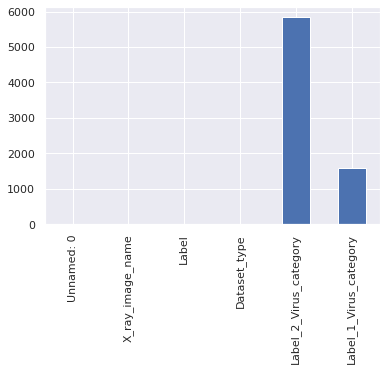

In [66]:
missing_vals = train_df.isnull().sum()
missing_vals.plot(kind = 'bar')


In [67]:
train_df.dropna(how = 'all')
train_df.isnull().sum()


Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [68]:
train_df.fillna('unknown', inplace=True)
train_df.isnull().sum()


Unnamed: 0                0
X_ray_image_name          0
Label                     0
Dataset_type              0
Label_2_Virus_category    0
Label_1_Virus_category    0
dtype: int64

In [69]:
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']
test_data = train_df[train_df['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == train_df.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)


Shape of train data : (5286, 6)
Shape of test data : (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5517,5540,NORMAL2-IM-0339-0001.jpeg,Normal,TEST,unknown,unknown
5772,5795,person78_bacteria_387.jpeg,Pnemonia,TEST,unknown,bacteria
5625,5648,person130_bacteria_623.jpeg,Pnemonia,TEST,unknown,bacteria
5838,5861,person23_virus_56.jpeg,Pnemonia,TEST,unknown,Virus
5454,5477,NORMAL2-IM-0196-0001.jpeg,Normal,TEST,unknown,unknown
5759,5782,person82_bacteria_403.jpeg,Pnemonia,TEST,unknown,bacteria
5412,5435,NORMAL2-IM-0287-0001.jpeg,Normal,TEST,unknown,unknown
5734,5757,person90_bacteria_442.jpeg,Pnemonia,TEST,unknown,bacteria
5808,5831,person48_virus_100.jpeg,Pnemonia,TEST,unknown,Virus
5657,5680,person120_bacteria_570.jpeg,Pnemonia,TEST,unknown,bacteria


In [70]:
print((train_df['Label_1_Virus_category']).value_counts())
print('--------------------------')
print((train_df['Label_2_Virus_category']).value_counts())


bacteria          2777
unknown           1576
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64
--------------------------
unknown          5841
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: Label_2_Virus_category, dtype: int64


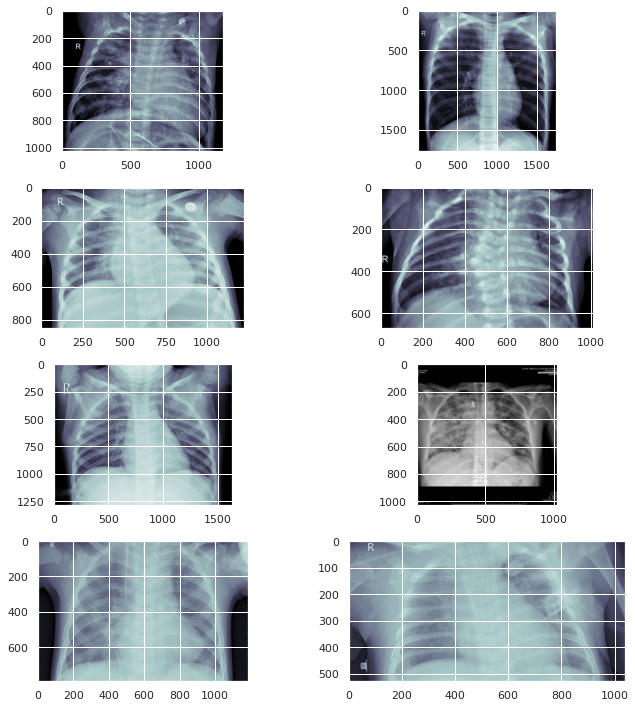

In [71]:
test_img_dir = '/content/sample_data/test'
train_img_dir = '/content/sample_data/train'
 
sample_train_images = list(os.walk(train_img_dir))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(train_img_dir, x), sample_train_images))
 
sample_test_images = list(os.walk(test_img_dir))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(test_img_dir, x), sample_test_images))
plt.figure(figsize = (10,10))
for iterator, filename in enumerate(sample_train_images):
    image = PIL.Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image, cmap=plt.cm.bone)
 
plt.tight_layout()


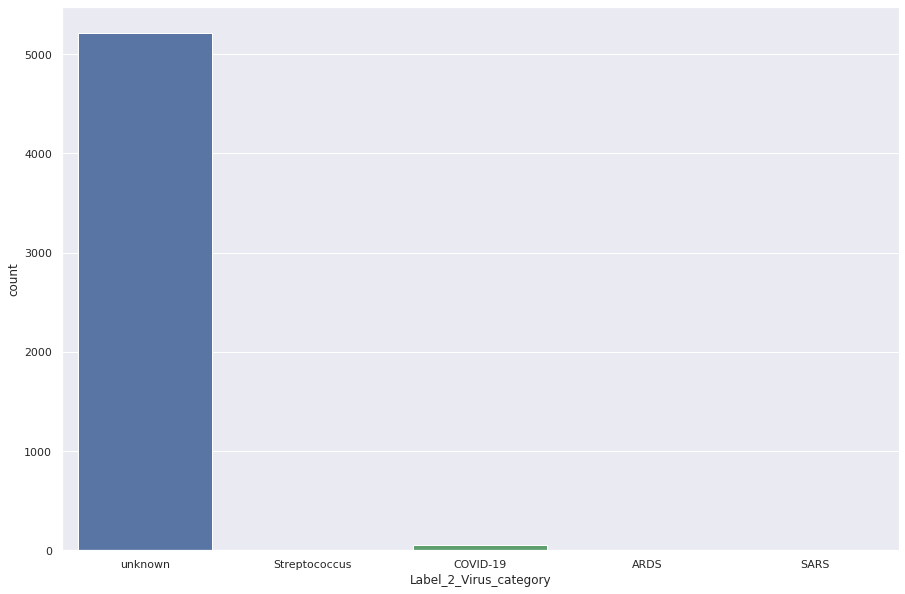

In [72]:
plt.figure(figsize=(15,10))
sns.countplot(train_data['Label_2_Virus_category']);


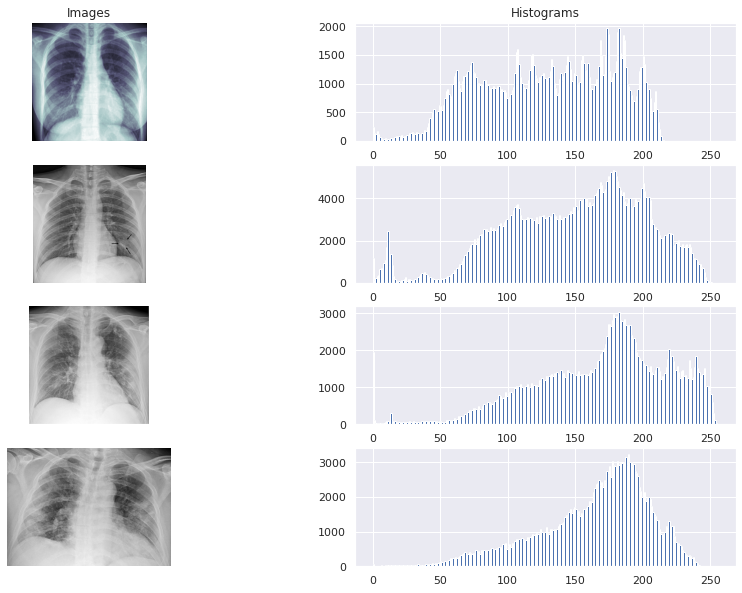

In [73]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))
 
 
covid_path = train_data[train_data['Label_2_Virus_category']=='COVID-19']['X_ray_image_name'].values
 
sample_covid_path = covid_path[:4]
sample_covid_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_covid_path))
 
for row, file in enumerate(sample_covid_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')


In [74]:
fig.suptitle('Label 2 Virus Category = COVID-19', size=16)
plt.show()


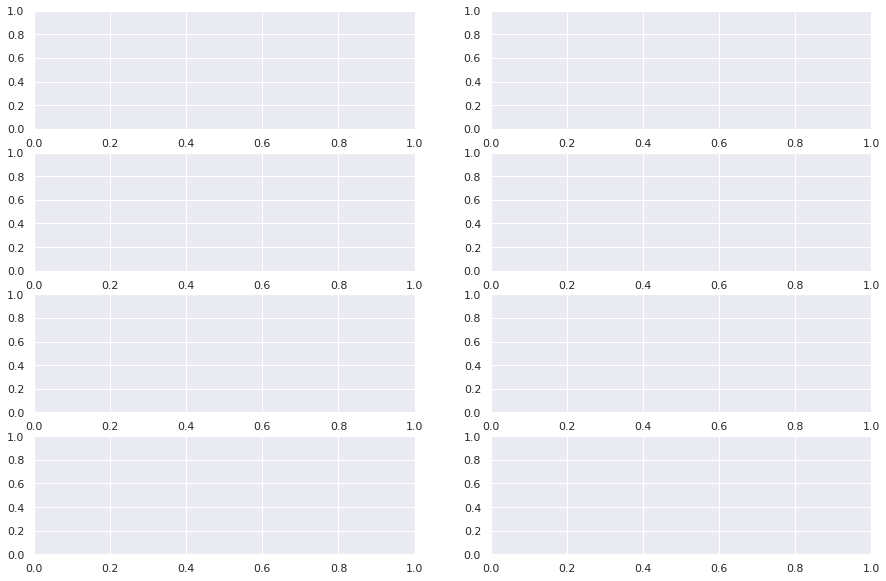

In [75]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))
 
 
normal_path = train_data[train_data['Label']=='Normal']['X_ray_image_name'].values
 
sample_normal_path = normal_path[:4]
sample_normal_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_normal_path))


In [76]:
for row, file in enumerate(sample_normal_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = NORMAL', size=16)
plt.show()


In [77]:
final_train_data = train_data[(train_data['Label'] == 'Normal') | 
                              ((train_data['Label'] == 'Pnemonia') &
                               (train_data['Label_2_Virus_category'] == 'COVID-19'))]


In [78]:
final_train_data['class'] = final_train_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')
test_data['class'] = test_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')
 
final_train_data['target'] = final_train_data.Label.apply(lambda x: 0 if x=='Normal' else 1)
test_data['target'] = test_data.Label.apply(lambda x: 0 if x=='Normal' else 1)
final_train_data = final_train_data[['X_ray_image_name', 'class', 'target', 'Label_2_Virus_category']]
final_test_data = test_data[['X_ray_image_name', 'class', 'target']]
test_data['Label'].value_counts()


Pnemonia    390
Normal      234
Name: Label, dtype: int64

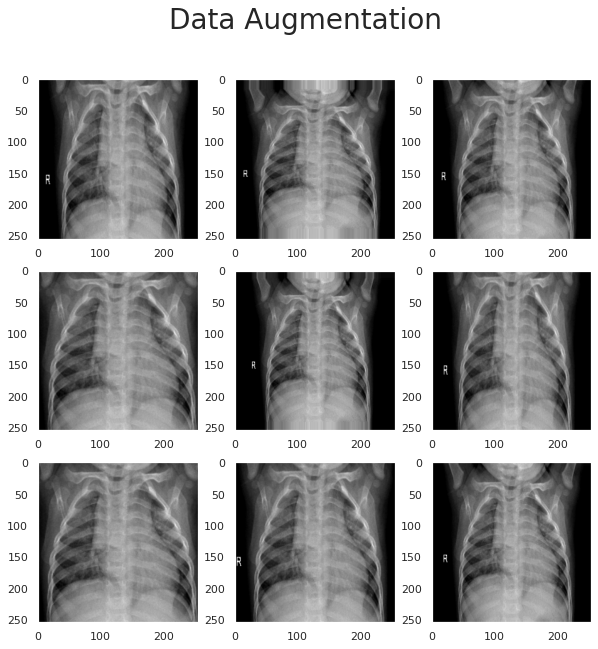

In [84]:
datagen =  ImageDataGenerator(
  shear_range=0.2,
  zoom_range=0.2,
)
 
def read_img(filename, size, path):
    img = image.load_img(os.path.join(path, filename), target_size=size)
    #convert image to array
    img = image.img_to_array(img) / 255
    return img
samp_img = read_img(final_train_data['X_ray_image_name'][0],
                                 (255,255),
                                 train_img_dir)
 
plt.figure(figsize=(10,10))
plt.suptitle('Data Augmentation', fontsize=28)
 
i = 0
 
 
for batch in datagen.flow(tf.expand_dims(samp_img,0), batch_size=6):
    plt.subplot(3, 3, i+1)
    plt.grid(False)
    plt.imshow(batch.reshape(255, 255, 3));
    
    if i == 8:
        break
    i += 1
    
plt.show();


In [85]:
corona_df = final_train_data[final_train_data['Label_2_Virus_category'] == 'COVID-19']
with_corona_augmented = []
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True 
 
def augment(name):
    img = read_img(name, (255,255), train_img_dir)
    i = 0
    for batch in tqdm(datagen.flow(tf.expand_dims(img, 0), batch_size=32)):
        with_corona_augmented.append(tf.squeeze(batch).numpy())
        if i == 20:
            break
        i =i+1
 
 
corona_df['X_ray_image_name'].apply(augment)


20it [00:00, 25.72it/s]
20it [00:00, 58.44it/s]
20it [00:00, 57.71it/s]
20it [00:00, 62.28it/s]
20it [00:00, 61.57it/s]
20it [00:00, 59.06it/s]
20it [00:00, 61.52it/s]
20it [00:00, 60.13it/s]
20it [00:00, 59.92it/s]
20it [00:00, 62.30it/s]
20it [00:00, 60.77it/s]
20it [00:00, 57.63it/s]
20it [00:00, 62.29it/s]
20it [00:00, 59.39it/s]
20it [00:00, 61.67it/s]
20it [00:00, 61.57it/s]
20it [00:00, 60.20it/s]
20it [00:00, 65.19it/s]
20it [00:00, 57.33it/s]
20it [00:00, 63.31it/s]
20it [00:00, 63.31it/s]
20it [00:00, 56.73it/s]
20it [00:00, 59.91it/s]
20it [00:00, 58.63it/s]
20it [00:00, 62.39it/s]
20it [00:00, 60.59it/s]
20it [00:00, 60.07it/s]
20it [00:00, 52.61it/s]
20it [00:00, 54.35it/s]
20it [00:00, 57.27it/s]
20it [00:00, 58.43it/s]
20it [00:00, 54.54it/s]
20it [00:00, 58.01it/s]
20it [00:00, 59.95it/s]
20it [00:00, 61.15it/s]
20it [00:00, 61.24it/s]
20it [00:00, 61.30it/s]
20it [00:00, 60.32it/s]
20it [00:00, 59.15it/s]
20it [00:00, 56.97it/s]
20it [00:00, 62.18it/s]
20it [00:00, 64.

5221    None
5222    None
5223    None
5224    None
5225    None
5226    None
5227    None
5228    None
5229    None
5230    None
5237    None
5238    None
5239    None
5240    None
5242    None
5243    None
5244    None
5245    None
5246    None
5247    None
5248    None
5249    None
5250    None
5251    None
5252    None
5253    None
5254    None
5255    None
5256    None
5257    None
5258    None
5259    None
5260    None
5261    None
5262    None
5263    None
5264    None
5265    None
5266    None
5267    None
5268    None
5269    None
5270    None
5271    None
5272    None
5273    None
5274    None
5275    None
5276    None
5277    None
5278    None
5279    None
5280    None
5281    None
5282    None
5283    None
5284    None
5285    None
Name: X_ray_image_name, dtype: object

In [86]:
train_arrays = [] 
final_train_data['X_ray_image_name'].apply(lambda x: train_arrays.append(read_img(x, (255,255), train_img_dir)))
test_arrays = []
final_test_data['X_ray_image_name'].apply(lambda x: test_arrays.append(read_img(x, (255,255), test_img_dir)))
print(len(train_arrays))
print(len(test_arrays))


1400
624


In [87]:
y_train = np.concatenate((np.int64(final_train_data['target'].values), np.ones(len(with_corona_augmented), dtype=np.int64)))

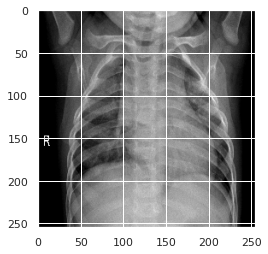

In [88]:
train_tensors = tf.convert_to_tensor(np.concatenate((np.array(train_arrays), np.array(with_corona_augmented))))
test_tensors  = tf.convert_to_tensor(np.array(test_arrays))
y_train_tensor = tf.convert_to_tensor(y_train)
y_test_tensor = tf.convert_to_tensor(final_test_data['target'].values)
 
train_dataset = tf.data.Dataset.from_tensor_slices((train_tensors, y_train_tensor))
test_dataset = tf.data.Dataset.from_tensor_slices((test_tensors, y_test_tensor))
for i,l in train_dataset.take(1):
    plt.imshow(i);


In [89]:
BATCH_SIZE = 16
BUFFER = 1000
 
train_batches = train_dataset.shuffle(BUFFER).batch(BATCH_SIZE)
test_batches = test_dataset.batch(BATCH_SIZE)
 
for i,l in train_batches.take(1):
    print('Train Shape per Batch: ',i.shape);
for i,l in test_batches.take(1):
    print('Test Shape per Batch: ',i.shape);


Train Shape per Batch:  (16, 255, 255, 3)
Test Shape per Batch:  (16, 255, 255, 3)


In [90]:
INPUT_SHAPE = (255,255,3) 
 
base_model = tf.keras.applications.ResNet50(input_shape= INPUT_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
 
# We set it to False because we don't want to mess with the pretrained weights of the model.
base_model.trainable = False


In [91]:
for i,l in train_batches.take(1):
    pass
base_model(i).shape


TensorShape([16, 8, 8, 2048])

In [92]:
model = Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,850,113
Trainable params: 262,401
Non-trainable params: 23,587,712
____________________________________

In [93]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
 
 
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])


In [94]:
model.fit(train_batches, epochs=10, validation_data=test_batches, callbacks=[callbacks])

Epoch 1/10
164/164 [==============================] - 722s 4s/step - loss: 0.5770 - accuracy: 0.7976 - val_loss: 0.5270 - val_accuracy: 0.7388
Epoch 2/10
164/164 [==============================] - 722s 4s/step - loss: 0.2926 - accuracy: 0.9099 - val_loss: 0.5516 - val_accuracy: 0.7628
Epoch 3/10
164/164 [==============================] - 705s 4s/step - loss: 0.2330 - accuracy: 0.9236 - val_loss: 0.6062 - val_accuracy: 0.7484


In [95]:
pred = model.predict(np.array(test_arrays))
pred =np.argmax(pred,axis=1)

# classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_data['target'], pred.flatten()))


20/20 [==============================] - 131s 6s/step
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       234
           1       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624



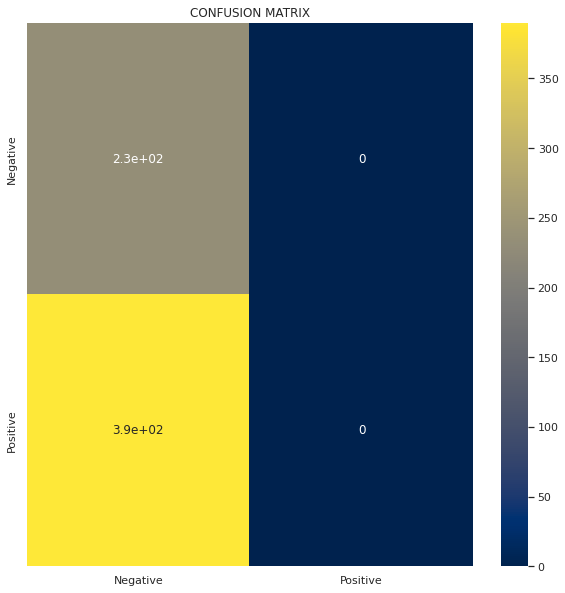

In [96]:
con_mat = confusion_matrix(test_data['target'], pred.flatten())
plt.figure(figsize = (10,10))
plt.title('CONFUSION MATRIX')
sns.heatmap(con_mat, cmap='cividis',
            yticklabels=['Negative', 'Positive'],
            xticklabels=['Negative', 'Positive'],
            annot=True);
